In [1]:
import tensorflow as tf

# for augmenting and creating data batches
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import numpy as np

In [2]:
# Loading CIFAR-10 dataset
''' The label classes in the dataset are:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10.truck '''

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Checking dataset shapes
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [3]:
# normaliing all pixels to range (0-1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# one hot coding

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# resizing all data

resize_shape = (64, 64)  # Resize to 64x64

x_train = tf.image.resize(x_train, resize_shape).numpy()
x_test = tf.image.resize(x_test, resize_shape).numpy()

In [6]:
# Augmenting the dataset

datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.2,    # Randomly shift horizontally
    height_shift_range=0.2,   # Randomly shift vertically
    shear_range=0.15,         # Shear intensity
    zoom_range=0.15,          # Zoom in/out
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill mode for newly created pixels
)

datagen.fit(x_train)  # Fit the data generator on training data

In [7]:
# splitting trainng data into train & validation

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
# creating data batches

train_generator = datagen.flow(x_train, y_train, batch_size=32)
val_generator = ImageDataGenerator().flow(x_val, y_val, batch_size=32)

In [9]:
# Creating & compiling a basic CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# training model

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 298s 237ms/step - accuracy: 0.3139 - loss: 1.8620 - val_accuracy: 0.5137 - val_loss: 1.3664
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 317s 234ms/step - accuracy: 0.4518 - loss: 1.5184 - val_accuracy: 0.5428 - val_loss: 1.2935
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 297s 238ms/step - accuracy: 0.4923 - loss: 1.4006 - val_accuracy: 0.5893 - val_loss: 1.1519
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 318s 234ms/step - accuracy: 0.5215 - loss: 1.3327 - val_accuracy: 0.6066 - val_loss: 1.1137
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 291s 233ms/step - accuracy: 0.5377 - loss: 1.2823 - val_accuracy: 0.6042 - val_loss: 1.1194
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 291s 233ms/step - accuracy: 0.5549 - loss: 1.2426 - val_accuracy: 0.6367 - val_loss: 1.0267
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 292s 233ms/step - accuracy: 0.5734 - loss: 1.1989 - val_accuracy: 0.6405 - val_loss: 1.0162
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 321s 233ms/step - accuracy: 0.5

In [11]:
# evaluating model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 21s - 66ms/step - accuracy: 0.6485 - loss: 0.9861
Test Accuracy: 0.6485000252723694


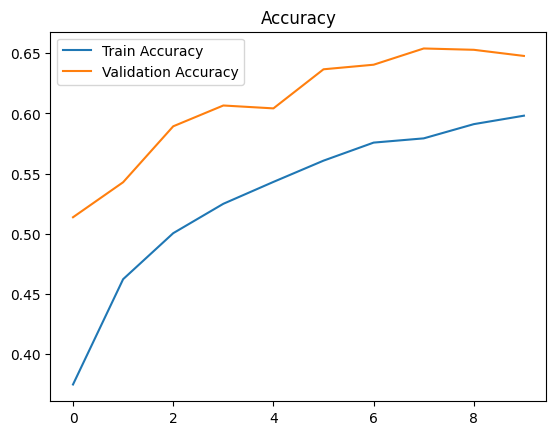

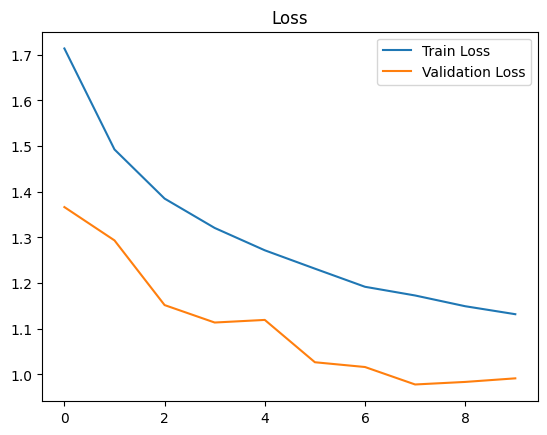

In [12]:
# visuliasing training

import matplotlib.pyplot as plt

# Plot accuracy

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()